# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
beer = pd.read_csv('./data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

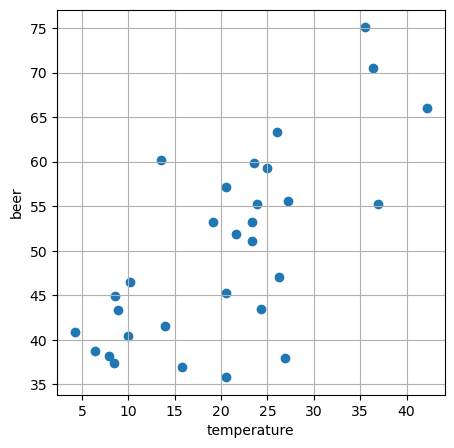

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'], beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [5]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [23]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [8]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 모델 구축

In [10]:
from sklearn.linear_model import LinearRegression
#모델 클래스 선택 후 인스턴스 객체 생성
lr = LinearRegression()


In [11]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [12]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.06666541566105)

In [32]:
#회귀식
print(f'y = {reg.coef_[0]:2f}X + {reg.intercept_:.3f}')

y = 0.697056X + 36.067


In [15]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

[60.81 50.36 54.33 50.36 41.92 43.18]


In [24]:
X_test.T

array([[35.5, 20.5, 26.2, 20.5,  8.4, 10.2]])

In [27]:
np.array(y_test).T

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

print('MSE:', np.round(mse,3))
print('RMSE:', np.round(rmse,3))


MSE: 91.347
RMSE: 9.558


In [18]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print('R2:', np.round(r2,3))

R2: 0.485


### 시각화

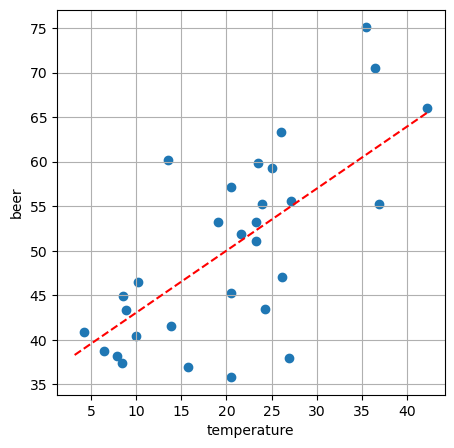

In [28]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx = np.arange(beer['temperature'].min()-1,
               beer['temperature'].max()+1)
yy = reg.predict(xx.reshape(len(xx), 1))
plt.plot(xx, yy, linestyle='--', color = 'red')

# 수집한 데이터셋 시각화
plt.scatter(beer['temperature'], beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [ ]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [33]:
age_height = pd.read_csv('./data/age_height.csv')
age_height

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

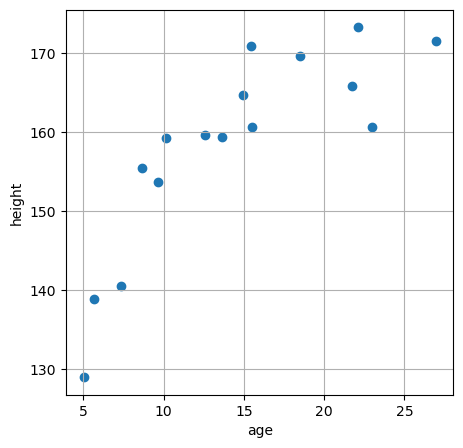

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [36]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split

X = np.array(age_height['age(X)']).reshape(-1, 1)
y = np.array(age_height['height(T)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression
#모델 클래스 선택 후 인스턴스 객체 생성
lr = LinearRegression()

In [37]:
#모델 객체 생성  및 학습
# 학습 수행
reg = lr.fit(X_train, y_train)

# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

#회귀식
print(f'y = {reg.coef_[0]:2f}X + {reg.intercept_:.3f}')

# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

y = 1.438635X + 138.784
[156.85 177.56 158.41 145.98]


In [38]:
y_test

array([159.70139552, 171.51757345, 159.42939554, 129.00206616])

In [39]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용

# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

#회귀식
print(f'y = {reg.coef_[0]:2f}X + {reg.intercept_:.3f}')

print('MSE:', np.round(mse,3)) 
print('RMSE:', np.round(rmse,3)) 
print('R2:', np.round(r2,3)) 


MSE: 83.495
RMSE: 9.138
R2: 0.663


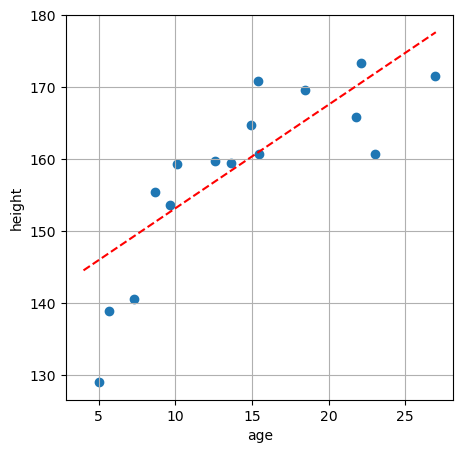

In [41]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
#y = 1.438635X + 138.784 시각화
plt.figure(figsize=(5,5))
xx = np.arange(age_height['age(X)'].min()-1,
               age_height['age(X)'].max()+1)
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx, yy, linestyle='--', color='red')

plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()


# < 스탯츠모델에서 단순선형회귀 수행>

In [31]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
beer = pd.read_csv('./data/beer.csv')
# 데이터 생성
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = sm.add_constant(X_train)

In [32]:
# 스탯츠모델
lr = sm.OLS(y_train, X_train)
reg = lr.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           9.50e-05
Time:                        15:52:56   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.000      29.193      42.941
x1             0.6971      0.147      4.757      0.000       0.393       1.001
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.363
Skew:                          -0.241   Prob(JB):                        0.834
Kurtosis:                       3.360   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 성능 평가


# 응용2: 농어 무게 예측

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
perch = [perch_length, perch_weight]
perch

[array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
        21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
        23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
        27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
        39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
        44. ]),
 array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
         130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
         225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
         265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
         685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
         900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])]

In [5]:
from sklearn.model_selection import train_test_split
X = np.array(perch_length).reshape(-1,1)
y = np.array(perch_weight)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train, y_train)

print(f'y = {reg.coef_:2f}X + {reg.intercept_:.3f}')

(array([35.63110638]), -618.331751171157)

In [13]:
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))
print(y_test)

[771.28 -83.87 771.28 183.37 361.52 361.52 450.6  628.76 806.91 700.02
 806.91 190.49]
[ 900.   40.  820.  130.  265.  250.  320.  840. 1015.  700.  900.  145.]


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

#회귀식
print('MSE:', np.round(mse,3)) 
print('RMSE:', np.round(rmse,3)) 
print('R2:', np.round(r2,3)) 

MSE: 14550.237
RMSE: 120.624
R2: 0.88


# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [40]:
# from sklearn.datasets import load_boston
# boston = load_boston()
import pandas as pd
boston = pd.read_csv('./data/boston_room_price.csv')

### 데이터 탐색

### 데이터 준비

In [41]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환
boston.head()

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [42]:
X = np.array(boston['RM']).reshape(-1,1)
y = boston['price']

In [43]:
#데이터 탐색


### 학습용/ 검증용 데이터 분리

In [44]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 모델 구축

In [45]:
lr = LinearRegression()
reg = lr.fit(X_train, y_train)
print(f'y = {reg.coef_[0]:2f}X + {reg.intercept_:.3f}')

y = 8.461092X + -30.571


In [46]:
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

[27.38 26.08 20.45 19.16 14.8  23.34 25.53 20.8  19.78 23.72 26.54 27.59
 17.92 18.39 20.39 16.88 25.69 43.25 21.57 11.11 17.7  17.05 24.99 23.71
 22.65 19.32 21.01 20.31 33.06 15.03 25.09 16.85 37.41 22.32 21.41 19.57
 23.08 29.9   4.44 21.16 23.01 22.82 25.42 21.57 21.76 27.17 35.44 19.24
 21.05 23.62 28.49 23.22 23.83 22.89 12.52 24.05 18.94 21.23 20.11 39.21
 23.67 25.53 18.05 23.14 15.22 28.49 39.97 24.76 20.27 18.96 22.84  8.79
 11.42 25.9  21.27 18.18 28.79 24.03 24.51 29.91 23.84 20.37 30.22 25.52
 24.34 23.11 23.72 23.84 18.45 23.03 28.45 43.07 20.05 20.3  21.9  20.27
 25.21 23.94 39.37 21.85 18.82 24.3  21.63 21.42 14.08 22.16 16.51 22.31
 21.49 26.8  32.63 23.72 21.83 32.21 31.47 30.16 20.07 15.59 28.86 39.63
 19.08 26.36 26.71 22.32 24.98 20.36 21.27 21.21 16.57 26.35 18.38 23.43
 21.98 12.04 25.43 30.65 15.14 19.99 35.13 28.39 19.65 21.47 18.81 24.27
 27.48 21.11 23.8  20.22 25.48 19.87 30.37 18.61]


In [47]:
y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
467    19.1
95     28.4
122    20.5
260    33.8
23     14.5
Name: price, Length: 152, dtype: float64

### 모델 평가

In [48]:
# MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# R2
r2 = r2_score(y_test, y_pred)

print(f'y = {reg.coef_[0]:2f}X + {reg.intercept_:.3f}')
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

y = 8.461092X + -30.571
MSE: 36.517214730838624
RMSE: 6.042947520112898
R2: 0.6015774471545623


### 시각화

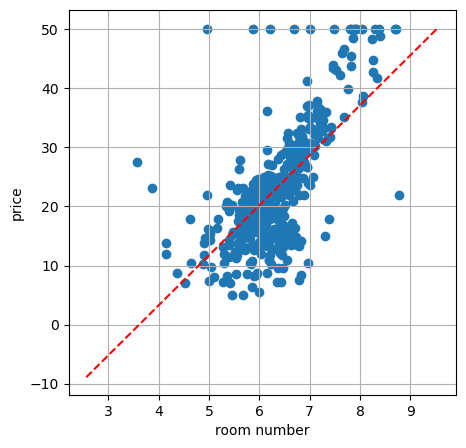

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
xx = np.arange(boston['RM'].min()-1,
               boston['RM'].max()+1)
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx, yy, linestyle='--', color='red')

plt.scatter(boston['RM'], boston['price'])
plt.xlabel('room number')
plt.ylabel('price')
plt.grid()
plt.show()
